In [1]:
from IPython.display import clear_output

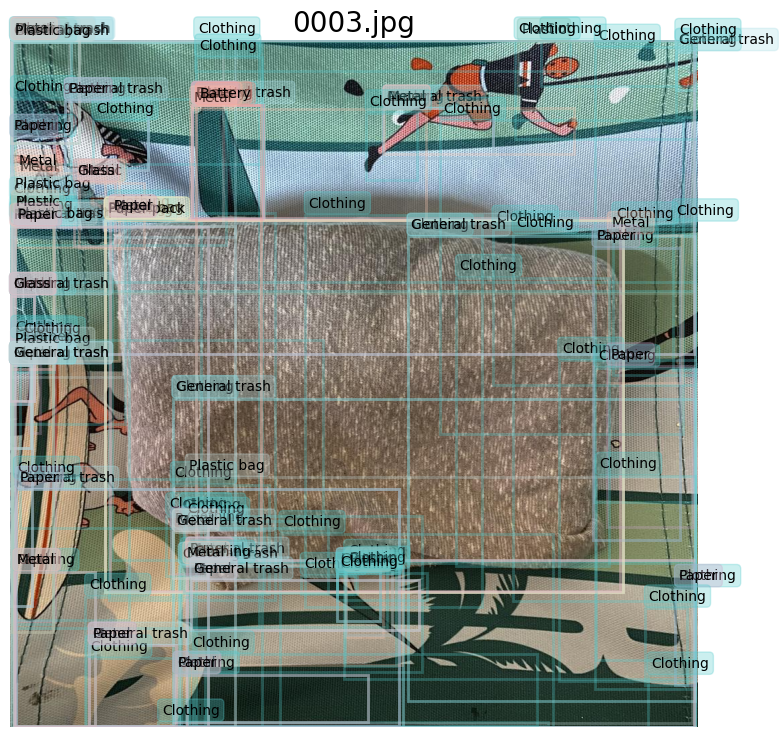

3


In [4]:
import os
import json
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12

COLOR_MAP = [
    (171, 222, 230), (203, 170, 203), (255, 255, 181), (255, 204, 182), (243, 176, 195),
    (151, 193, 169), (254, 225, 232), (198, 219, 218), (255, 150, 138), (85, 203, 205)
]
CATEGORIES = (
    "General trash", "Paper", "Paper pack", "Metal", "Glass", 
    "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"
)

output_dir = \
    '/data/ephemeral/home/level2-objectdetection-cv-02\
/mmdetection/work_dirs/\
diffusiondet/20240115_095922/submit/submission.csv'
data_dir = '/data/ephemeral/home/dataset/'
start_num = 0


df = pd.read_csv(output_dir)

for i, bbox_info in enumerate(df.iloc[start_num:,0]):
    bbox_info = bbox_info.split()
    img_path = os.path.join(data_dir, df.iloc[i, 1])
    img_path = data_dir + df.iloc[i, 1]
    img = Image.open(img_path).convert("RGB")
    fig, ax = plt.subplots()
    for j in range(len(bbox_info))[::6]:    
        cat_id, pred, bbox = int(bbox_info[j]), float(bbox_info[j+1]), list(map(float, bbox_info[j+2:j+6]))
        cat_name = CATEGORIES[cat_id]
        color = [num/255 for num in COLOR_MAP[cat_id%10]]
        
        bbox_rect = patches.Rectangle(
            (bbox[0], bbox[1]), 
            (bbox[2]-bbox[0]), (bbox[3]-bbox[1]), 
            linewidth=2, 
            edgecolor=color, 
            facecolor='none',
            alpha=0.3
        )
        ax.add_patch(bbox_rect)
        bbox_anno = plt.text(bbox[0]+5, bbox[1]-12, cat_name, fontsize=10)
        bbox_anno.set_bbox(dict(facecolor=color, alpha=0.3, boxstyle='round,pad=0.3', edgecolor=color))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(img_path.split('/')[-1], fontsize=20)
    plt.tight_layout()
    plt.show()
    
    ipt = input("'q' -> finish | any comment -> output/submission/comment.jpg | enter -> next image   ")
    if ipt == 'q': 
        print(i)
        break 
    elif ipt:
        os.makedirs('output/submission/', exist_ok=True)
        fig, ax = plt.subplots()
        for j in range(len(bbox_info))[::6]:    
            cat_id, pred, bbox = int(bbox_info[j]), float(bbox_info[j+1]), list(map(float, bbox_info[j+2:j+6]))
            cat_name = CATEGORIES[cat_id]
            color = [num/255 for num in COLOR_MAP[cat_id%10]]
            
            bbox_rect = patches.Rectangle(
                (bbox[0], bbox[1]), 
                (bbox[2]-bbox[0]), (bbox[3]-bbox[1]), 
                linewidth=2, 
                edgecolor=color, 
                facecolor='none',
                alpha=0.3
            )
            ax.add_patch(bbox_rect)
            bbox_anno = plt.text(bbox[0]+5, bbox[1]-12, cat_name, fontsize=10)
            bbox_anno.set_bbox(dict(facecolor=color, alpha=0.3, boxstyle='round,pad=0.3', edgecolor=color))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(img_path.split('/')[-1], fontsize=20)
        plt.tight_layout()
        plt.savefig(f'output/submission/{ipt}.jpg')
    
    clear_output(wait=True)

In [ ]:
df

,PredictionString,image_id
0,7 0.999446451663971 604.88776 520.35645 955.14...,/test/0000.jpg
1,5 0.9766100645065308 342.9677 246.2011 755.414...,/test/0001.jpg
2,4 0.9893879890441895 866.3949 244.31708 914.76...,/test/0002.jpg
3,9 0.9884405136108398 150.02074 261.54623 922.3...,/test/0003.jpg
4,0 0.8985896706581116 187.24355 265.14905 865.7...,/test/0004.jpg
...,...,...
4866,0 0.7380320429801941 293.24915 350.054 672.535...,/test/4866.jpg
4867,3 0.9790441393852234 417.91882 315.26813 781.6...,/test/4867.jpg
4868,7 0.9067631363868713 126.06881 469.84573 761.3...,/test/4868.jpg
4869,0 0.8132966160774231 489.35242 407.1575 656.46...,/test/4869.jpg
